In [246]:
#lets import in the libraries
import pandas as pd
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d #deze

import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns; sns.set()
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols    
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d


df_wash_school=pd.read_csv("merged_data_3.csv",encoding="latin-1") #import the csv in a datafunction
df_wash_school.head() 
df_wash_school.columns 
df_wash_school2=df_wash_school.replace("-",np.nan) #Replace all instances of - with NaN

#Make a new dataframe called country filled with the country name, the literacy rate and the basic hygene level
country=df_wash_school2['Country']
country=pd.DataFrame(country,columns=['Country'])
country["Literacy Rate"]=df_wash_school2["Value"]
country["Hygiene basic"]=df_wash_school2["NH_Basic hygiene service"]

countrycleaned=country.dropna() # Remove all instances containing NaN to clean up the dataset
countrycleaned["Hygiene basic"]=countrycleaned["Hygiene basic"].astype(float) # Adjusting data/text to floating values
countrycleaned.describe() # Determine characteristics

C:\Users\Zaza\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Literacy Rate,Hygiene basic
count,40.000000,40.000000
mean,83.735646,54.027103
std,20.328496,41.537234
min,32.003840,0.000000
25%,77.180605,14.671639
50%,93.721325,46.898134
75%,98.209348,100.000000
max,99.994860,100.000000


In [248]:
#!pip install plotly.express

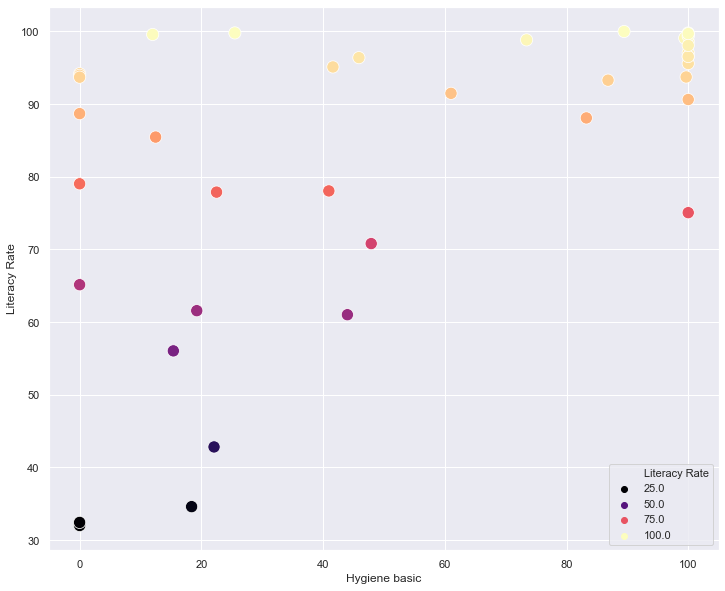

In [249]:

# Plotting the dataset on literacy rate and basic hygene - Leerdoel: add country labels to datapoints
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1)    
sns.scatterplot(x="Hygiene basic", y="Literacy Rate",s=150,hue="Literacy Rate", palette="magma", data=countrycleaned)

In [250]:
country3D=df_wash_school2['Country']
country3D=pd.DataFrame(country,columns=['Country'])
country3D["Water basic"]=df_wash_school2["NWA_Basic water service"]
country3D["Sanitation basic"]=df_wash_school2["NS_Basic sanitation service"]
country3D["Hygiene basic"]=df_wash_school2["NH_Basic hygiene service"]

countrycleaned3D=country3D.dropna() # Remove all instances containing NaN to clean up the dataset
countrycleaned3D["Water basic"]=countrycleaned3D["Water basic"].astype(float) # Adjusting data/text to floating values
countrycleaned3D["Sanitation basic"]=countrycleaned3D["Sanitation basic"].astype(float) # Adjusting data/text to floating values
countrycleaned3D["Hygiene basic"]=countrycleaned3D["Hygiene basic"].astype(float) # Adjusting data/text to floating values
countrycleaned3D.describe() # Determine characteristics

C:\Users\Zaza\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zaza\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Zaza\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,Water basic,Sanitation basic,Hygiene basic
count,88.000000,88.000000,88.000000
mean,69.584299,74.534431,60.635418
std,36.243958,31.633831,40.853515
min,0.000000,0.000000,0.000000
25%,50.470253,55.883252,19.035474
50%,81.121045,89.966652,71.801704
75%,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000


In [251]:
countrycleaned3D

,Country,Water basic,Sanitation basic,Hygiene basic
1,Algeria,93.306713,98.950000,98.580000
2,Andorra,100.000000,100.000000,100.000000
4,Australia,100.000000,100.000000,100.000000
5,Azerbaijan,100.000000,100.000000,100.000000
6,Bahrain,100.000000,100.000000,100.000000
...,...,...,...,...
141,Uzbekistan,89.515447,91.554383,89.463429
143,West Bank and Gaza Strip,80.432091,80.853155,23.247694
144,Yemen,35.572950,25.022754,8.000000
145,Zambia,79.000000,66.400000,53.562000


Text(0.5, 0, 'Hygiene basic')

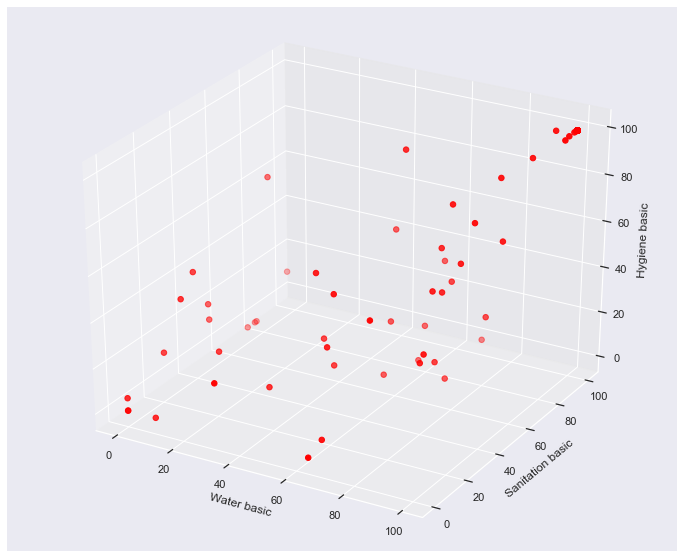

In [264]:
# An attempt to a 3D plot without seaborn

ax1 = plt.axes(projection='3d')

ax1.scatter3D(countrycleaned3D['Water basic'],countrycleaned3D['Sanitation basic'],countrycleaned3D['Hygiene basic'], s=30, color = 'red')
ax1.set_xlabel('Water basic')
ax1.set_ylabel('Sanitation basic')
ax1.set_zlabel('Hygiene basic')






#sns.set(rc={'figure.figsize':(12,10)})
#sns.set(font_scale = 1)
#px.scatter3D(x="Water basic", y="Sanitation basic", s=150, hue="Water basic", palette="magma", data=countrycleaned3D)

In [255]:
df_wash_school2

,Unnamed: 0,Country,Year,School age population (thousands),urban,pre-primary,primary,secondary,NWA_Basic water service,NWA_Limited water service,...,PH_Basic hygiene service,PH_Limited hygiene service,PH_No hygiene service,SH_Basic hygiene service,SH_Limited hygiene service,SH_No hygiene service,EDULIT_IND,Indicator,TIME,Value
0,0,Afghanistan,2016,13299.24707,27.13200188,15.83112907,45.34436417,38.82450485,0,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Algeria,2016,8512.623047,71.30400085,10.01031017,42.57013321,47.41955566,93.30671292,0,...,97.78,NaN,NaN,99.3,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Andorra,2016,NaN,NaN,NaN,NaN,NaN,100,0,...,100,0,0,100,0,0,NaN,NaN,NaN,NaN
3,3,Argentina,2016,10821.82813,91.89299774,20.48494911,40.30799484,39.20705414,0,89.9,...,NaN,NaN,NaN,NaN,NaN,NaN,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",2013.0,99.12195
4,7,Australia,2016,4197.949219,89.55399323,7.541897297,51.23599625,41.22210693,100,0,...,100,0,0,100,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,207,Venezuela (Bolivarian Republic of),2016,8120.288086,89.04299927,21.93379021,43.16289139,34.90332031,97.49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",2015.0,96.60522
143,209,West Bank and Gaza Strip,2016,1627.468994,75.48101044,16.21290398,30.05906677,53.72802734,80.43209096,18.23574753,...,22.05323194,70.34676806,7.6,28.8590604,58.4509396,12.69,NaN,NaN,NaN,NaN
144,210,Yemen,2016,10290.42285,35.18700027,22.49840546,41.0004921,36.50110245,35.57295029,25.65204971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,211,Zambia,2016,7265.85791,41.37900925,28.90901566,44.35268402,26.73830032,79,NaN,...,51.55389323,NaN,NaN,62.96122209,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
# An attempt to a 3D plot of WaSH with using seaborn
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale = 1)
sns.plotly(x="Water basic", 
                y="Sanitation basic", 
                z="Hygiene basic",
                s=150,
                hue="Water basic", 
                palette="magma", 
                data=countrycleaned3D)

AttributeError: module 'seaborn' has no attribute 'plotly'

In [150]:
a (Bolivarian Republic of)	97.12709	-
212	Zimbabwe	88.69342	0
134 rows × 3 columns

SyntaxError: invalid syntax (<ipython-input-150-fbf6208588f7>, line 1)

In [61]:
country.columns()

TypeError: 'Index' object is not callable

In [29]:
df_wash_school.iloc[:,3]
#df_hygiene_1=df_wash_school("val.1")



#df_wash_school.iloc[:,60]

0      13299.24707
1      8512.623047
2                -
3      10821.82813
4      10821.82813
          ...     
208    8120.288086
209    1627.468994
210    10290.42285
211     7265.85791
212    6010.006836
Name: School age population (thousands), Length: 213, dtype: object

In [58]:
for i in range(0,152):
    for j in [7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58]:
        if df_wash_school.iloc[i,j]!="-" and df_wash_school.iloc[i,j+1]!="-":
            if round(float(df_wash_school.iloc[i,j]),0)+round(float(df_wash_school.iloc[i,j+1]),0)==100:
                df_wash_school.iloc[i,j+2]=0
        if df_wash_school.iloc[i,j]!="-" and df_wash_school.iloc[i,j+2]!="-":
            if round(float(df_wash_school.iloc[i,j]),0)+round(float(df_wash_school.iloc[i,j+2]),0)==100:
                df_wash_school.iloc[i,j+1]=0
        if df_wash_school.iloc[i,j+2]!="-" and df_wash_school.iloc[i,j+1]!="-":
            if round(float(df_wash_school.iloc[i,j+2]),0)+round(float(df_wash_school.iloc[i,j+1]),0)==100:
                df_wash_school.iloc[i,j]=0    
            
                        
    

In [59]:
df_wash_school.to_csv("df_wash_school_imputed_last.csv")

(152, 61)

In [60]:
df_wash_school_imputed=pd.read_csv("df_wash_school_imputed_last.csv",encoding="latin-1")

In [61]:
is_2016 =  df_wash_school_imputed['Year']==2016

In [65]:
wash_school_2016=df_wash_school_imputed[is_2016]

In [78]:
Litracy_rate_2016=Litracy_rates[is_2016_2]

In [79]:
is_adult_both_sexes=Litracy_rate_2016["Indicator"]=="Adult literacy rate, population 15+ years, both sexes (%)"

In [80]:
Litracy_rate_2016_adult=Litracy_rate_2016[is_adult_both_sexes]

In [81]:
Litracy_rate_2016_adult.head()

,EDULIT_IND,Indicator,Country,TIME,Value
21,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2013,74.13088
22,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2014,74.84184
23,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2015,75.59041
24,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Lower middle income countries,2016,76.25343
43,LR_AG15T99,"Adult literacy rate, population 15+ years, bot...",Pakistan,2013,55.59499


In [86]:
merged_data=pd.merge(wash_school_2016,Litracy_rate_2016_adult,left_on="Country",right_on="Country",how="left")

In [88]:
merged_data.to_csv("merged_school_wash.csv")

In [89]:
new_df=pd.read_csv("merged_school_wash.csv")